In [2]:
import pandas as pd
import re
import emoji
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:

Isear_raw = pd.read_csv("isear_dataset-master/isear.csv", delimiter='|')

# Remove the very last unnecessary column
if 'Unnamed: 42' in Isear_raw.columns: 
    Isear_raw = Isear_raw.drop(columns=['Unnamed: 42'])

isear = pd.DataFrame(Isear_raw)


print("ISEAR : \n\n", isear.head(10))



ISEAR : 

       ID  CITY  COUN  SUBJ  SEX  AGE  RELI  PRAC  FOCC  MOCC  ...  SELF  RELA  \
0  11001     1     1     1    1   33     1     2     6     1  ...     3     3   
1  11001     1     1     1    1   33     1     2     6     1  ...     2     2   
2  11001     1     1     1    1   33     1     2     6     1  ...     2     1   
3  11001     1     1     1    1   33     1     2     6     1  ...     1     1   
4  11001     1     1     1    1   33     1     2     6     1  ...     0     2   
5  11001     1     1     1    1   33     1     2     6     1  ...     1     2   
6  11001     1     1     1    1   33     1     2     6     1  ...     1     0   
7  11002     1     1     2    2   23     0     0     7     5  ...     3     0   
8  11002     1     1     2    2   23     0     0     7     5  ...     2     0   
9  11002     1     1     2    2   23     0     0     7     5  ...     2     1   

   VERBAL  NEUTRO   EMOT_T  Field3  Field2   MYKEY  \
0       2       0      joy       4       3 

In [4]:
print("ISEAR Info : ", isear.info())
print("ISEAR Null Values : ", isear.isnull().sum())
print("ISEAR Shape : ", isear.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      7666 non-null   int64 
 1   CITY    7666 non-null   int64 
 2   COUN    7666 non-null   int64 
 3   SUBJ    7666 non-null   int64 
 4   SEX     7666 non-null   int64 
 5   AGE     7666 non-null   int64 
 6   RELI    7666 non-null   int64 
 7   PRAC    7666 non-null   int64 
 8   FOCC    7666 non-null   int64 
 9   MOCC    7666 non-null   int64 
 10  FIEL    7666 non-null   int64 
 11  EMOT    7666 non-null   int64 
 12  WHEN    7666 non-null   int64 
 13  LONG    7666 non-null   int64 
 14  INTS    7666 non-null   int64 
 15  ERGO    7666 non-null   int64 
 16  TROPHO  7666 non-null   int64 
 17  TEMPER  7666 non-null   int64 
 18  EXPRES  7666 non-null   int64 
 19  MOVE    7666 non-null   int64 
 20  EXP1    7666 non-null   int64 
 21  EXP2    7666 non-null   int64 
 22  EXP10   7666 non-null   

In [5]:
isear_text = isear["SIT"] 
isear_text

0       During the period of falling in love, each tim...
1              When I was involved in a traffic accident.
2       When I was driving home after  several days of...
3       When I lost the person who meant the most to me. 
4       The time I knocked a deer down - the sight of ...
                              ...                        
7661    Two years back someone invited me to be the tu...
7662    I had taken the responsibility to do something...
7663    I was at home and I heard a loud sound of spit...
7664    I did not do the homework that the teacher had...
7665    I had shouted at my younger brother and he was...
Name: SIT, Length: 7666, dtype: object

In [6]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove unwanted punctuations
    
    # Handle specific punctuations and emoticons
    emoticon_dict = {
        ":)": "happy",
        ":))": "happy",
        ":-)": "happy",
        ":-))": "happy",
        ":(": "sad",
        ":((": "sad",
        ":-((": "sad",
        ":-((": "sad",
        ":/": "confusion", 
        "://": "confusion", 
        ":-/": "confusion",
        ":-//": "confusion",
        ":\\": "confusion",
        ":-\\": "confusion",
        ":|": "neutral",
        ":-|": "neutral",
        "XD": "laugh",
        ":D": "laugh",
        ":-D": "laugh"
    }
    
    # Replace emoticons with words
    for emoticon, replacement in emoticon_dict.items():
        text = text.replace(emoticon, replacement)
    
    # Handle emojis
    text = emoji.demojize(text)
    
    # Remove non-alphanumeric characters except spaces (next line removes unnecessary spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [7]:


print(preprocess_text("I'm Amirali :), hahaha 😸😸🤣🤣🤣🤣🤣🤣🤣🤣"))

im amirali happy hahaha grinningcatwithsmilingeyesgrinningcatwithsmilingeyesrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughing


In [8]:
isear['SIT_clean'] = isear['SIT'].apply(preprocess_text)
isear['SIT_clean'], "----------", isear['SIT']

(0       during the period of falling in love each time...
 1               when i was involved in a traffic accident
 2       when i was driving home after several days of ...
 3         when i lost the person who meant the most to me
 4       the time i knocked a deer down the sight of th...
                               ...                        
 7661    two years back someone invited me to be the tu...
 7662    i had taken the responsibility to do something...
 7663    i was at home and i heard a loud sound of spit...
 7664    i did not do the homework that the teacher had...
 7665    i had shouted at my younger brother and he was...
 Name: SIT_clean, Length: 7666, dtype: object,
 '----------',
 0       During the period of falling in love, each tim...
 1              When I was involved in a traffic accident.
 2       When I was driving home after  several days of...
 3       When I lost the person who meant the most to me. 
 4       The time I knocked a deer down - the sight o

In [9]:

def bar_chart(title, x_label, y_label, data):
    # Plot the most frequent words
    plt.figure(figsize=(10, 6))
    data.head(20).plot(kind='bar')
    plt.title('Top 20 Most Frequent Words (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()
    
def BoW(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    word_counts = df_bow.sum(axis=0).sort_values(ascending=False)
    
    # Use word cloud for representation 
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (BoW)')
    plt.show()
    
    # Plot heatmap for top 50 words
    top_words = word_counts.head(20).index
    df_top_bow = df_bow[top_words]

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_top_bow, annot=False, cmap='YlGnBu', cbar=True, yticklabels=False)
    plt.title('Heatmap of Top 50 Word Frequencies (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Documents')
    plt.show()
    
    # Convert to long format for scatter plot
    df_bow_long = df_bow[top_words].stack().reset_index()
    df_bow_long.columns = ['Document', 'Word', 'Count']

    # Plot scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_bow_long, x='Word', y='Count', hue='Document', palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Scatter Plot of Word Frequencies (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

    
def TF_IDF(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    X_tfidf = tfidf_vectorizer.fit_transform(corpus)
    df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    word_tfidf = df_tfidf.sum(axis=0).sort_values(ascending=False)
    
    # Use word cloud for representation
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_tfidf)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (TFIDF)')
    plt.show()
    
    # Plot heatmap for top 50 words
    top_words = word_tfidf.head(20).index
    df_top_tfidf = df_tfidf[top_words]

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_top_tfidf, annot=False, cmap='YlGnBu', cbar=True, yticklabels=False)
    plt.title('Heatmap of Top 50 TFIDF Scores')
    plt.xlabel('Words')
    plt.ylabel('Documents')
    plt.show()
    
    # Convert to long format for scatter plot
    df_tfidf_long = df_tfidf[top_words].stack().reset_index()
    df_tfidf_long.columns = ['Document', 'Word', 'TFIDF']

    # Plot scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_tfidf_long, x='Word', y='TFIDF', hue='Document', palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Scatter Plot of TFIDF Scores')
    plt.xlabel('Words')
    plt.ylabel('TFIDF')
    plt.show()


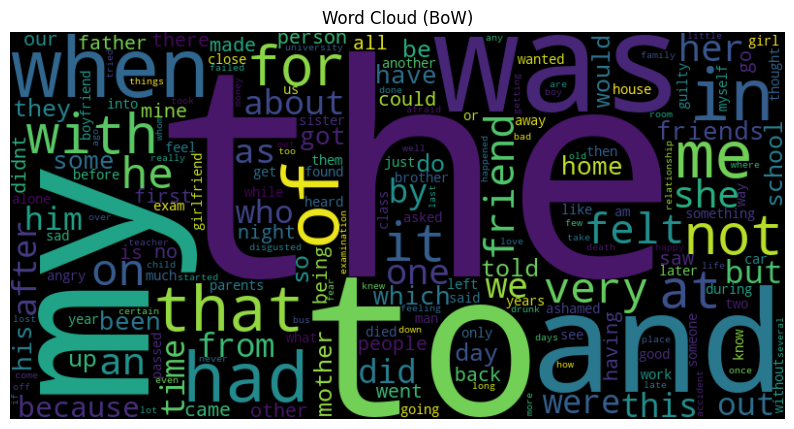

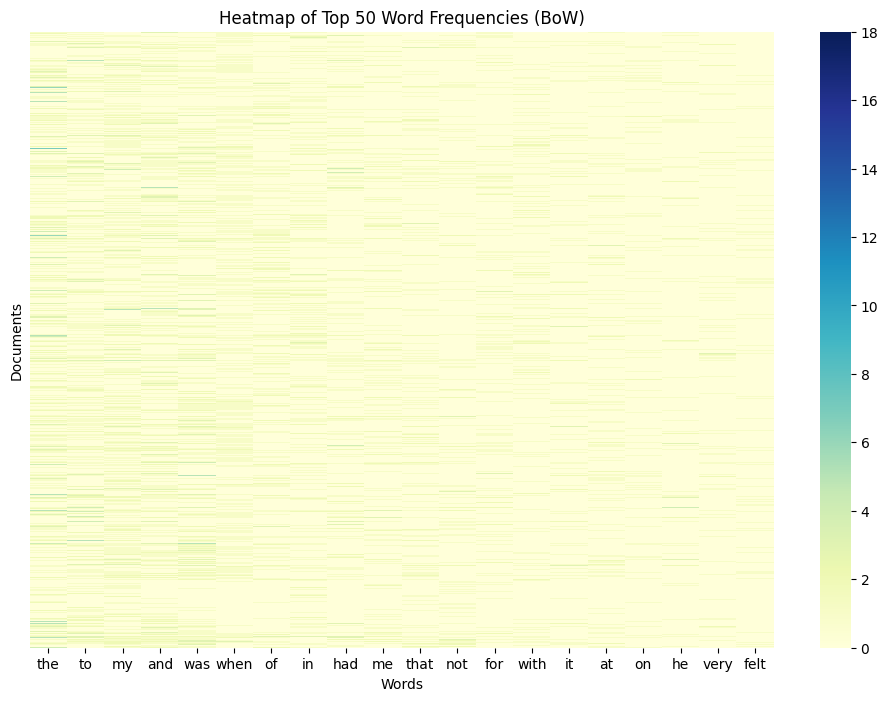

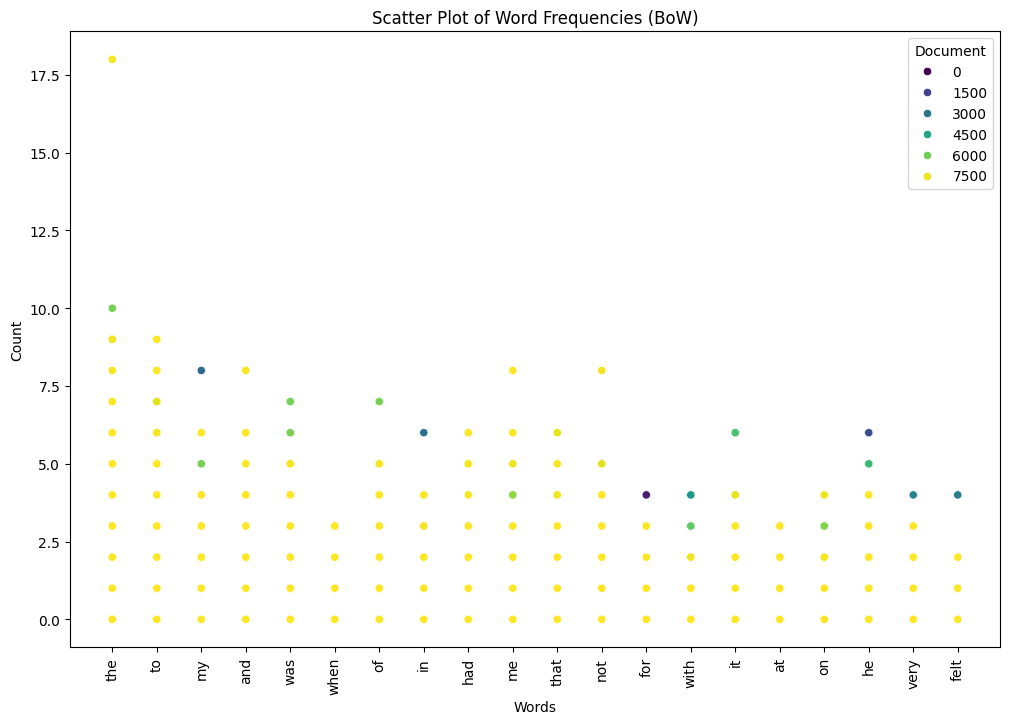

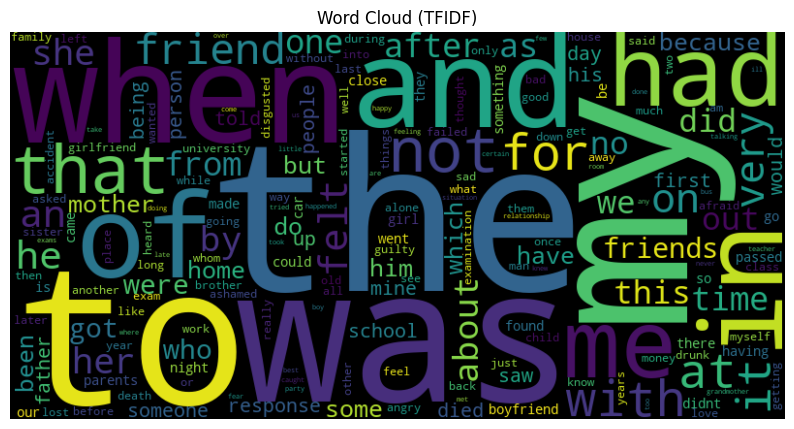

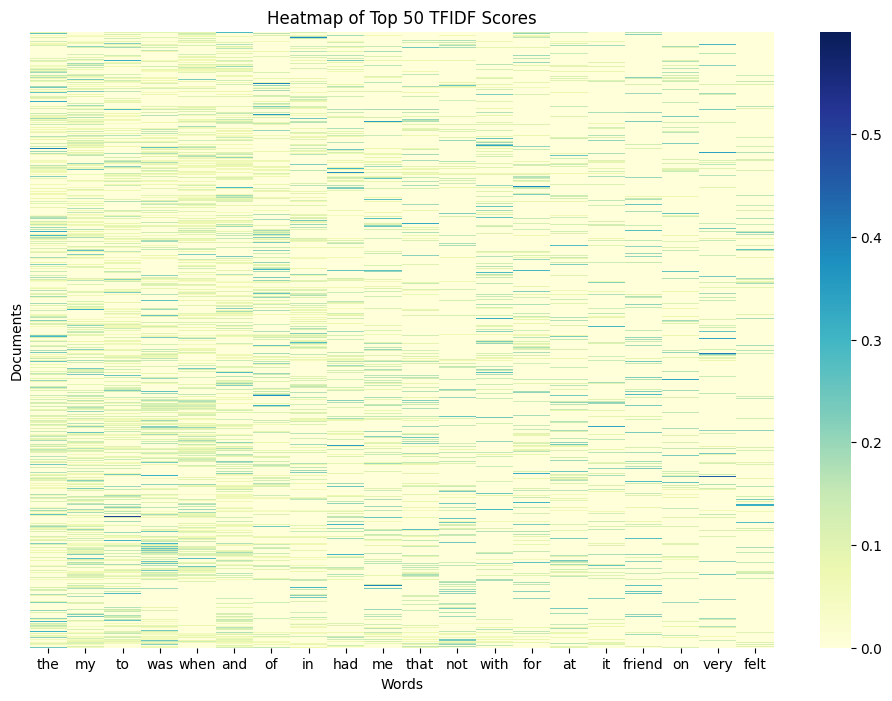

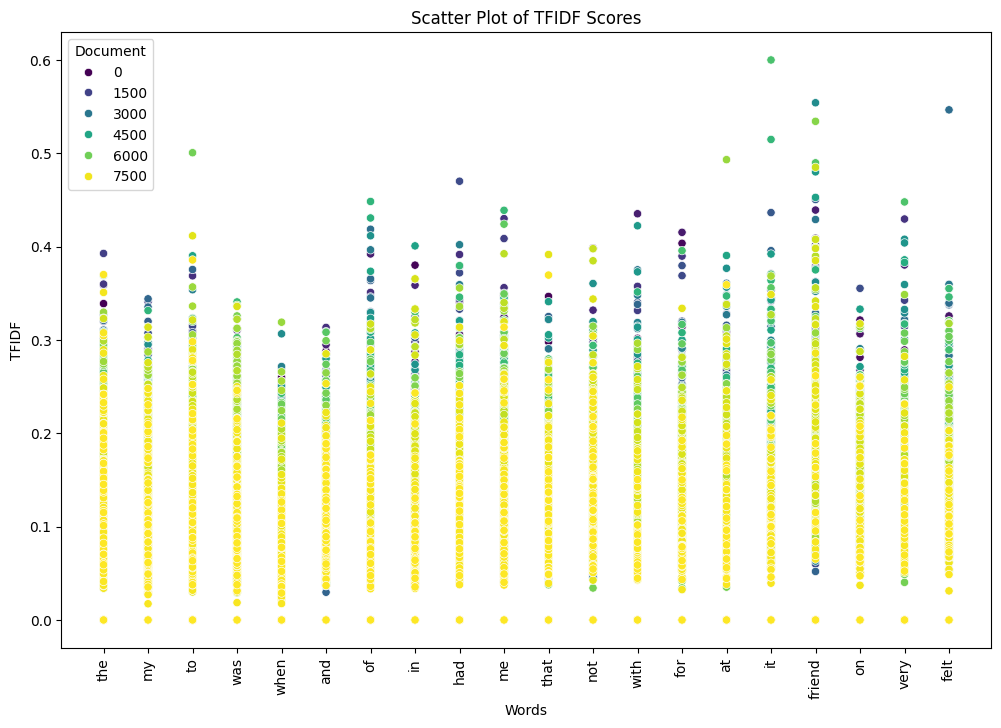

In [10]:
BoW(isear['SIT_clean'])
TF_IDF(isear['SIT_clean'])


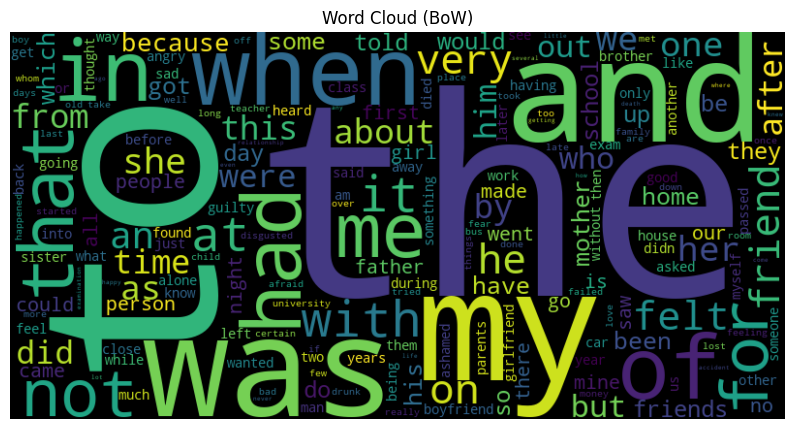

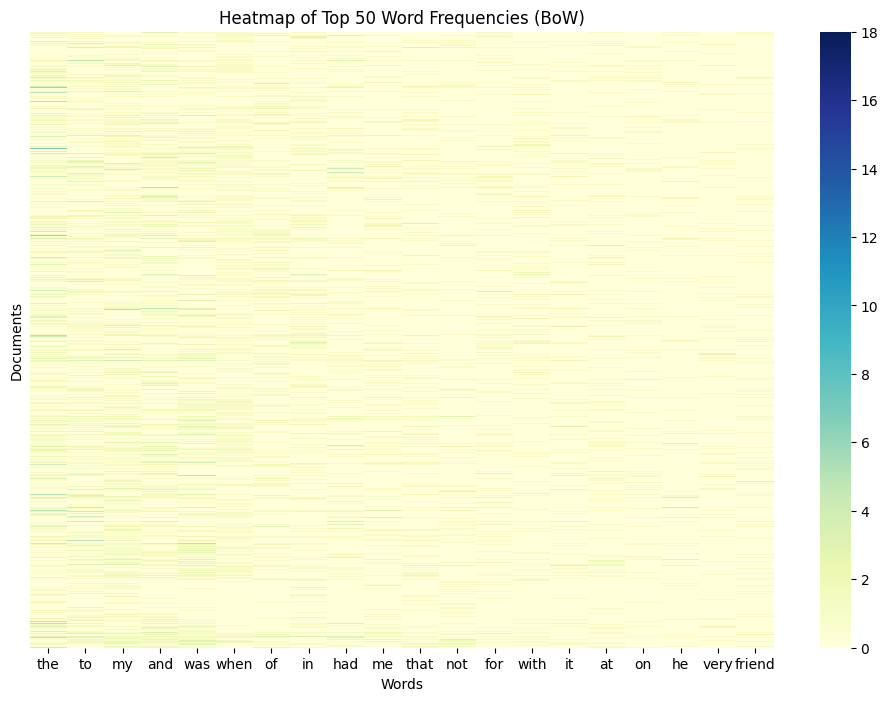

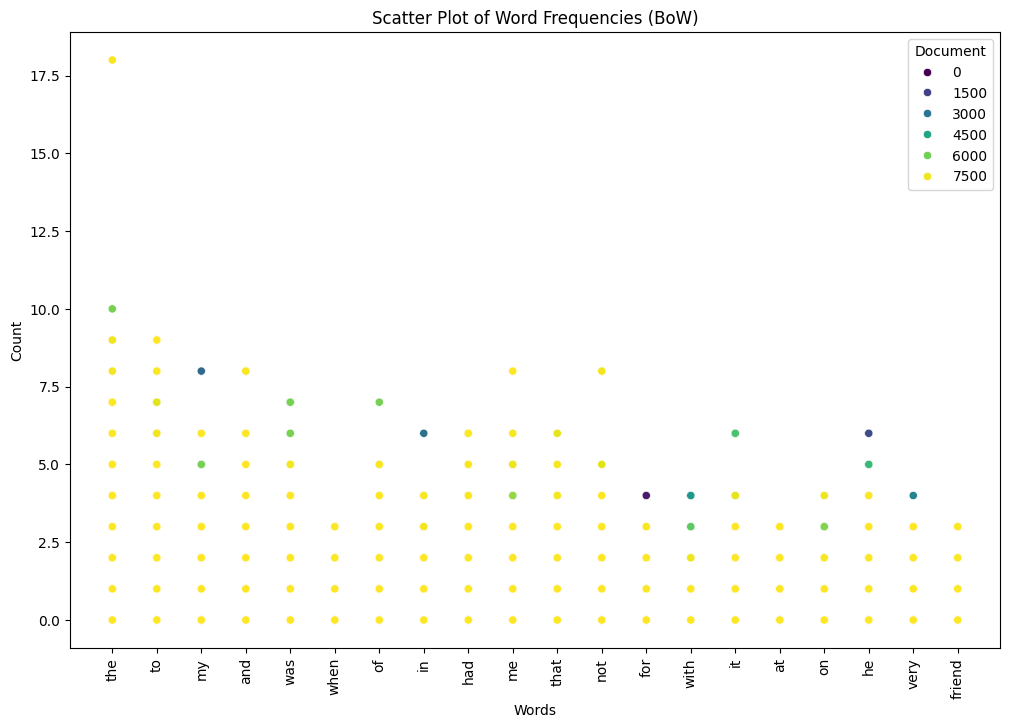

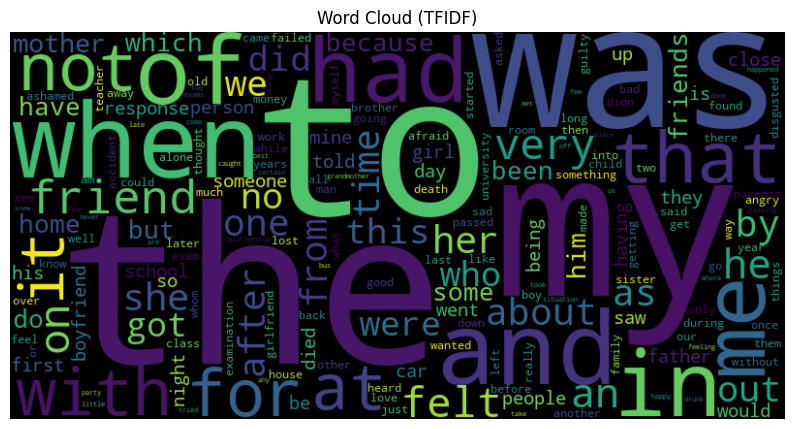

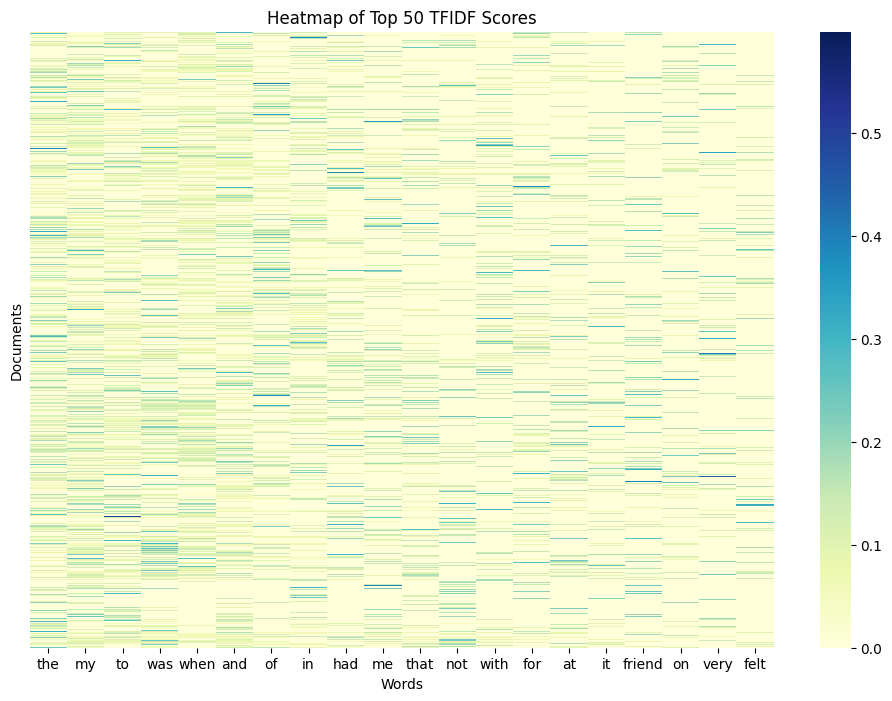

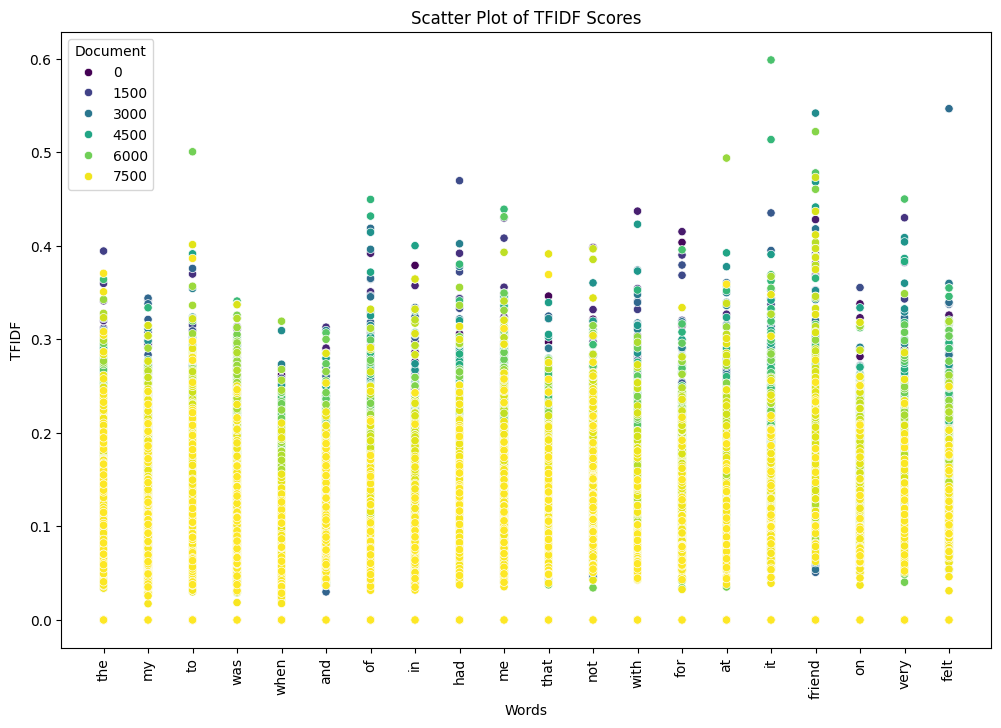

In [11]:
BoW(isear['SIT'])
TF_IDF(isear['SIT'])

In [12]:

analyzer = SentimentIntensityAnalyzer() # Determine the polarity of the data and calculate their sentiment scores, compare and detect un-normal data  

# Function to get sentiment
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # Compound score between -1 and 1


for i in range(len(isear['SIT'])):
    clean_sentiment_score = get_sentiment(isear['SIT_clean'][i])
    text_sentiment_score = get_sentiment(isear['SIT'][i])
    
    
    

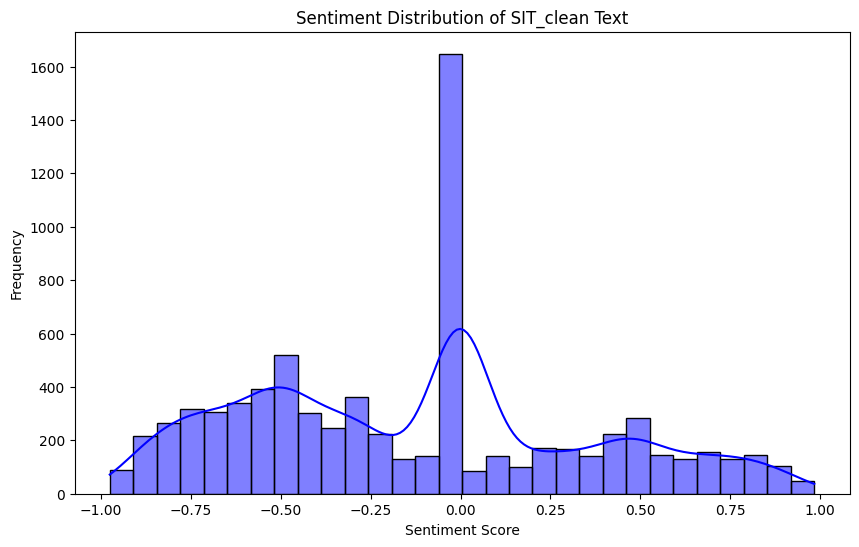

In [13]:
# 1. Sentiment Distribution
sentiment_scores = [get_sentiment(text) for text in isear['SIT_clean']]
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_scores, kde=True, color='blue', bins=30)
plt.title("Sentiment Distribution of SIT_clean Text")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

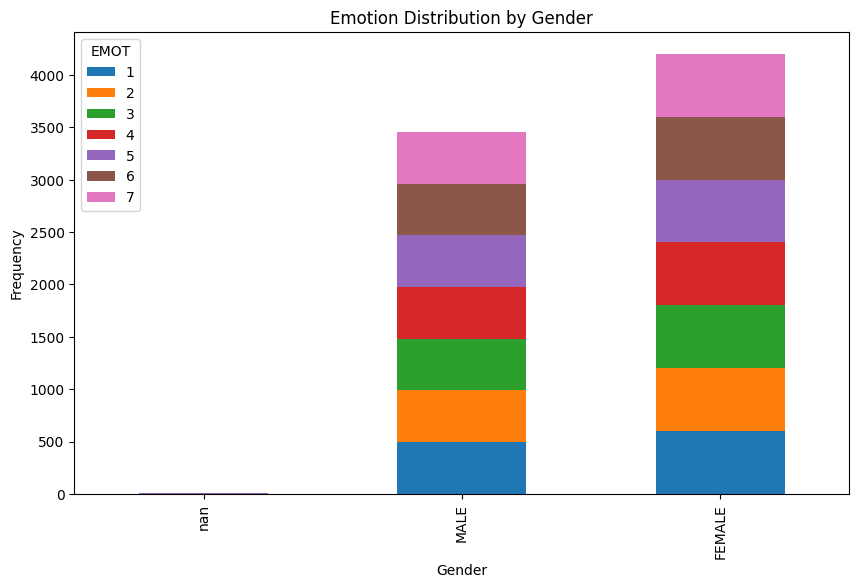

In [14]:
# 3. Gender and Emotion Analysis

SEX_LABELS = {1: "MALE", 2: "FEMALE"}

gender_emotion = isear.groupby(['SEX', 'EMOT']).size().unstack()

gender_emotion.index = gender_emotion.index.map(SEX_LABELS)

gender_emotion.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title("Emotion Distribution by Gender")
plt.ylabel("Frequency")
plt.xlabel("Gender")
plt.show()


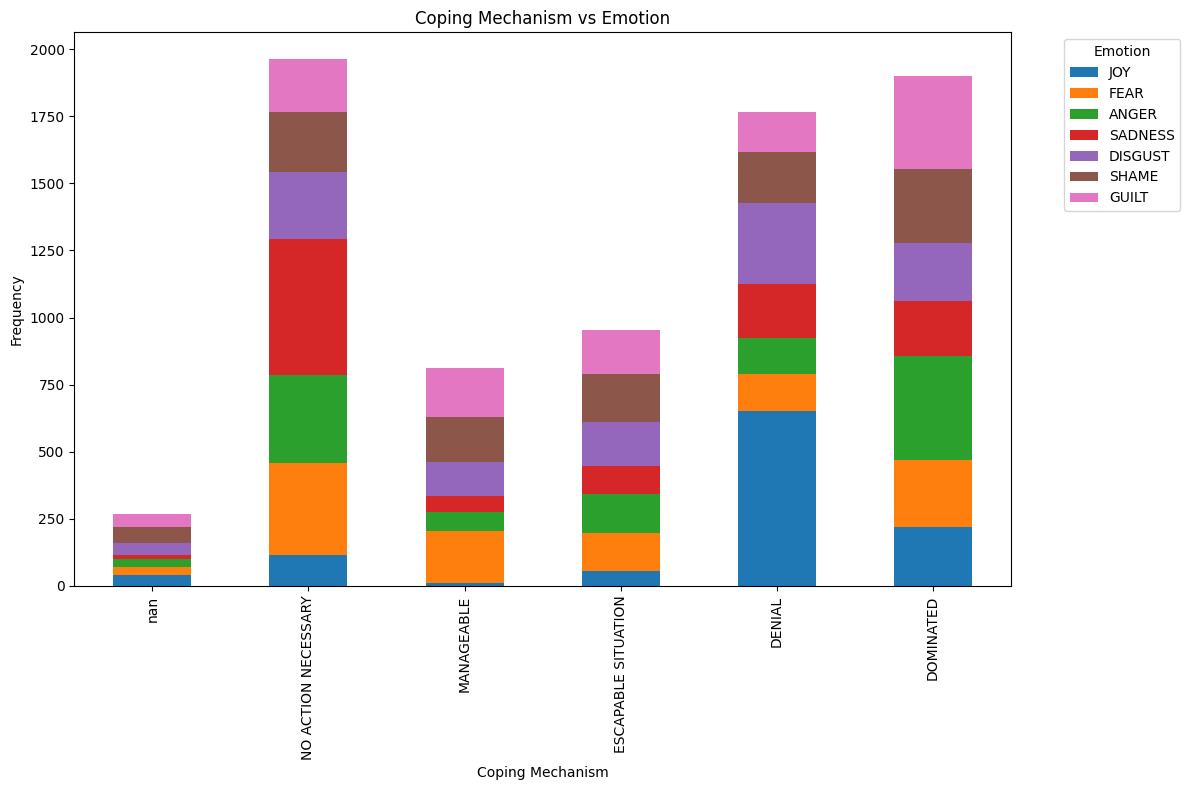

In [15]:
# 4. Coping Mechanism vs Emotion

EMOT_LABELS = {1: "JOY", 2: "FEAR", 3: "ANGER", 4: "SADNESS", 5: "DISGUST", 6: "SHAME", 7: "GUILT"}
# Define labels for coping mechanisms
COPING_LABELS = {
    1: "NO ACTION NECESSARY",
    2: "MANAGEABLE",
    3: "ESCAPABLE SITUATION",
    4: "DENIAL",
    5: "DOMINATED"
}

# Drop rows with missing COPING or EMOT values
cleaned_isear = isear.dropna(subset=['COPING', 'EMOT'])

# Map the numeric labels to descriptive labels
coping_emotion = isear.groupby(['COPING', 'EMOT']).size().unstack()
coping_emotion.index = coping_emotion.index.map(COPING_LABELS)
coping_emotion.columns = coping_emotion.columns.map(EMOT_LABELS)

# Plot the updated bar chart
coping_emotion.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title("Coping Mechanism vs Emotion")
plt.ylabel("Frequency")
plt.xlabel("Coping Mechanism")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()